In [15]:
from __future__ import division
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from pylab import *
import numpy.random as rnd

In [16]:
matplotlib.rcParams.update({"axes.formatter.limits": (-3,3)})
plotStyles={"markersize":10,"markeredgewidth":2.0,"linewidth":2.0}
stepStyles={"markersize":12,"markeredgewidth":3.0,"linewidth":3.0,"where":"post"}

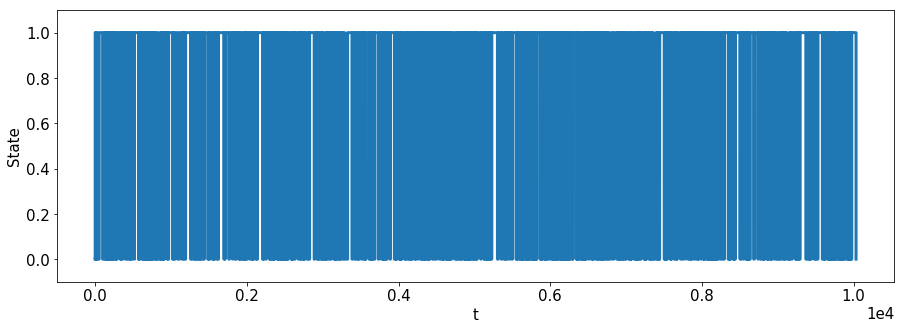

In [17]:
# Run a folding simulation for 10000 seconds.
# Create a list of waiting times (the time between transitions) in both the folded and unfolded state.
# Use the np.histogram function to calculate a histogram of the waiting times for both states, using 20 bins.
# Plot the two histograms as bar plots.
# Hint: the np.histogram function returns the bin edges, you will want to plot the bars located at the bin centers.
# Hint 2: for n bins there will be n+1 edges and n centers.

k1=0.15
k2=0.07

ts=[0.0]   # a list of the times when a state change has occurred
states=[0] # state 0 is unfolded, state 1 is folded
tf=10000.0   # the final time of the simulation

while (ts[-1]<tf):
    # If we are in the unfolded state, figure out when the molecule transitions to the folded state.
    if states[-1] == 0:
        ts.append(ts[-1]+rnd.exponential(1/k1))
        states.append(1)
        
    # If we are in the folded state, figure out when the molecule transitions to the unfolded state.
    else:
        ts.append(ts[-1]+rnd.exponential(1/k2))
        states.append(0)

matplotlib.rcParams.update({'font.size': 15, "figure.figsize": (15,5)})
step(ts,states, **stepStyles)
xlabel('t'); ylim([-0.1,1.1]); ylabel('State');

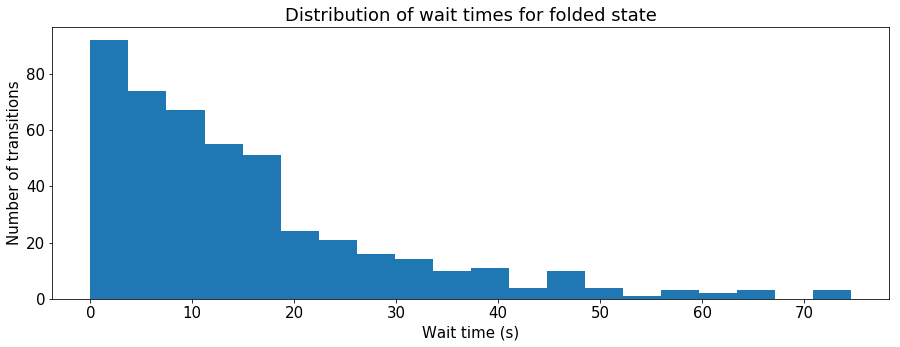

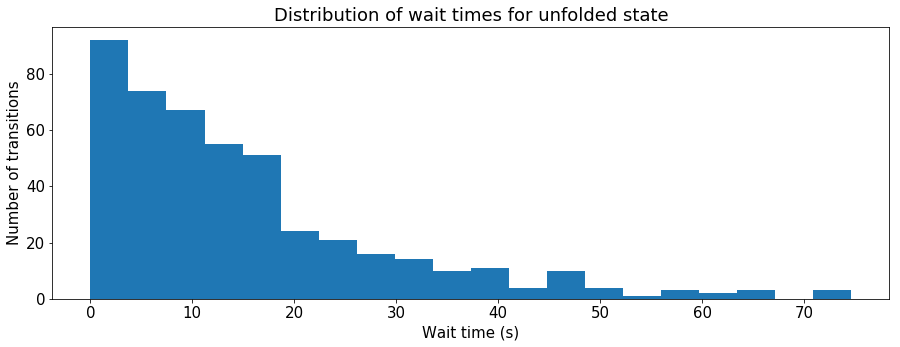

In [18]:
wfold = []
wunfold = []

for i in range(0,len(ts)):
    if i == 0:
        continue
    elif (i % 2) == 0:
        wait = ts[i] - ts[i-1]
        wfold.append(wait)
    else:
        wait = ts[i] - ts[i-1]
        wunfold.append(wait)

def plotwaits(listid, stateid):
    fig, ax = plt.subplots()
    ax.hist(wfold,bins=20)
    ax.set_xlabel("Wait time (s)")
    ax.set_ylabel("Number of transitions")
    ax.set_title("Distribution of wait times for " + stateid + (" state"))

plotwaits(wfold, "folded")
plotwaits(wunfold, "unfolded")

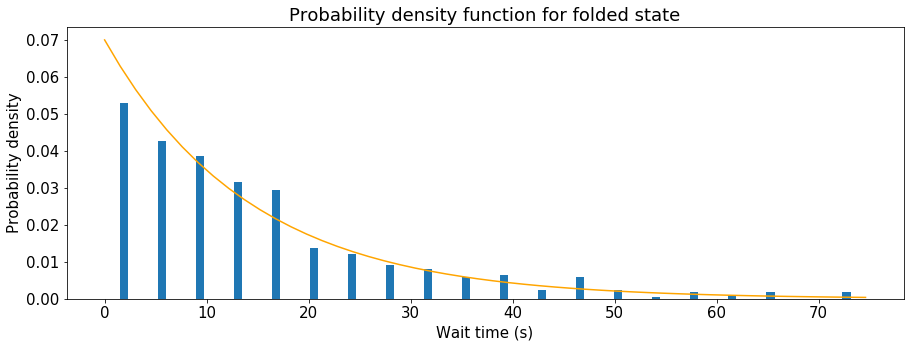

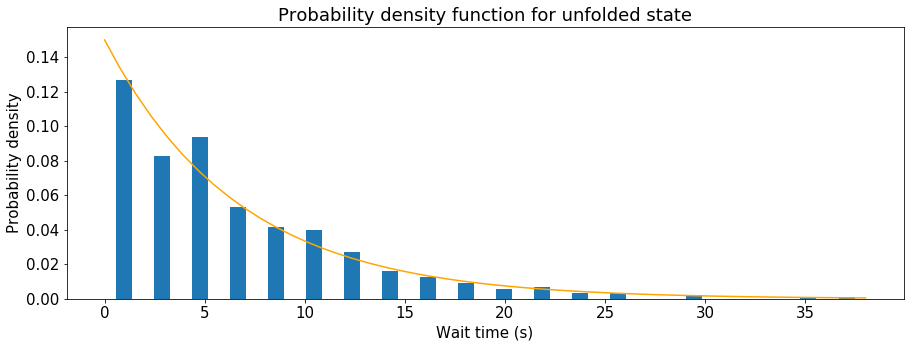

In [20]:
# The histogram function returns the number of counts in each bin.
# To compare with our kinetics equations, we need to convert the counts into a probability density function (PDF).
# To do so, divide the histogram counts by the sum of all the counts and also by the width of the bin.
# The bins are all the same size by default, so you can divide each count by the width of the first bin.
# Plot the calculated PDFs for the folding and unfolding transition times as a bar plot.
# On top of the bar plots, plot the PDF for an exponential distribution:
# p(t)=k*e^{-k*t}, where k is K1 or K2 as appropriate.

def plotpdfs(listid, kval, stateid):
    
    hist, edges = np.histogram(listid, bins=20)

    xcoords = []
    for i in range(0,len(edges)):
        if i == 0:
            continue
        else:
            coord = (edges[i] + edges[i-1])/2
            xcoords.append(coord)

    width = edges[1] - edges[0]
    sum_counts = sum(hist)

    xvals = np.linspace(0,edges[-1]) # linearly spaced numbers
    yvals = kval*(exp(-kval*xvals)) # computing the values

    pdfs = [(count/sum_counts)/width for count in hist]
    fig, ax2 = plt.subplots()
    ax2.bar(xcoords,pdfs,width=0.8)
    ax2.plot(xvals,yvals,color="orange")
    ax2.set_xlabel("Wait time (s)")
    ax2.set_ylabel("Probability density")
    ax2.set_title("Probability density function for " + stateid + (" state"))

plotpdfs(wfold, k2, "folded")
plotpdfs(wunfold, k1, "unfolded")

In [21]:
# Write a python script to fit your calculated PDFs to exponential distributions to estimate K1 and K2.
# Plot the calculated PDFs as bar plots overlaid with the best fit estimates.
# What is the relative error in your estimated K1 and K2 vs the actual K1 and K2?

from scipy.optimize import curve_fit

# Define function for fitting
def expdistrib(x, k):
    return (k*(exp(-k*x)))

def fitpdfs(listid):
    
    hist, edges = np.histogram(listid, bins=50)
    
    width = edges[1] - edges[0]
    sum_counts = sum(hist)
    
    pdfs = [(count/sum_counts)/width for count in hist]

    xvals = np.linspace(0,edges[-1])
    # Initial guess
    p0 = [0.15]

    # Fit data
    popt, pcov = curve_fit(expdistrib, xvals, pdfs, p0)
    return(popt, pcov)
    
fopt, fcov = fitpdfs(wfold)
print("k2 = " + str(fopt))
print("k2 error = " + str(fcov))

uopt, ucov = fitpdfs(wunfold)
print("k1 = " + str(uopt))
print("k1 error = " + str(ucov))

k2 = [0.05868275]
k2 error = [[4.17742409e-06]]
k1 = [0.13613891]
k1 error = [[3.41532336e-05]]
